In [1]:
!pip install --upgrade --q --no-cache-dir gdown




!gdown 1G4jyWGcAxKTvEe26GWwObt5ifRqziMRI

Downloading...
From (uriginal): https://drive.google.com/uc?id=1G4jyWGcAxKTvEe26GWwObt5ifRqziMRI
From (redirected): https://drive.google.com/uc?id=1G4jyWGcAxKTvEe26GWwObt5ifRqziMRI&confirm=t&uuid=d5539b21-aa9e-4d39-afa6-e346abb74f13
To: /content/mitbih_train.csv
100% 412M/412M [00:08<00:00, 47.4MB/s]


In [2]:
!pip install --upgrade --q --no-cache-dir gdown



!gdown 1IdTpHyx9pwmfnIezt8O7kMXz3BbEuTGh

Downloading...
From: https://drive.google.com/uc?id=1IdTpHyx9pwmfnIezt8O7kMXz3BbEuTGh
To: /content/mitbih_test.csv
100% 103M/103M [00:04<00:00, 22.8MB/s] 


In [3]:
!pip install --upgrade --q --no-cache-dir gdown



!gdown 1cZu6s_b5Ah1OC06zewt87O83ZkaPwLBS

Downloading...
From: https://drive.google.com/uc?id=1cZu6s_b5Ah1OC06zewt87O83ZkaPwLBS
To: /content/ptbdb_abnormal.csv
100% 49.4M/49.4M [00:01<00:00, 27.7MB/s]


In [4]:

!pip install --upgrade --q --no-cache-dir gdown



!gdown 12KYqhrPKtLZam_aNPEdnXecssi_bagI3

Downloading...
From: https://drive.google.com/uc?id=12KYqhrPKtLZam_aNPEdnXecssi_bagI3
To: /content/ptbdb_normal.csv
100% 19.0M/19.0M [00:00<00:00, 25.1MB/s]


In [5]:
!pip install scikit-learn==0.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 37.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


#ECG Heartbeat Classification Datset
This notebook involves the making of machine learning models to classify the given data of obtained as an heartbeat ECG into differen classes. We'll undergo machine learning processes to classify them. AS given in the dataset, we are given 5 different classes of heartbeat as [N:0, S:1, V:2 , F:3, Q:4]

N: Non-Ectopic Beats
S: Superventrical Ectopic Beats
V: Ventricular Ectopic Beats
F: Fusion Beats
Q: Unknown Beats
The CNN Algotithm that we'll implement will classigy the given heartbeat into one of these classes

In [6]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, tqdm, re, time, itertools, sys
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras import optimizers, losses, activations, models
#import keras.utils.np_utils
from tensorflow.keras import utils
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint,EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [7]:
# loading all data files into memory
start = time.time()

data_train = pd.read_csv('/content/mitbih_train.csv', header=None)
data_test = pd.read_csv('/content/mitbih_test.csv', header=None)
abnormal = pd.read_csv('/content/ptbdb_abnormal.csv', header=None)
normal = pd.read_csv('/content/ptbdb_normal.csv', header=None)

end = time.time()
print('Time taken: %.3f seconds' % (end-start))

print('Data loaded........ Sucessfully')

Time taken: 8.710 seconds
Data loaded........ Sucessfully


In [8]:
data_train[187].unique()

array([0., 1., 2., 3., 4.])

In [9]:
data_train.shape

(87554, 188)

In [10]:
data_test.shape

(21892, 188)

In [11]:
normal = normal.drop([187], axis=1)
abnormal = abnormal.drop([187], axis=1)

#EDA (EXPLORATORY DATA ANALYSIS) ||
In this step, we will undergo an EDA (Exploratory Data Analysis) to get brief understanding of our data. We are given a data concerned with the ECG of a patient, classified into normal and abnormal classes. We'll make some plots to see the variations in the heart rate of a patient with normal and abnormal ECG.

In [12]:
data_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [13]:
abnormal.shape, normal.shape

((10506, 187), (4046, 187))

We have a total of 10506 rows and 188 columns for abormal & 4045 rows and 188 columns of a normal ECG in our data

In [14]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As it can be seen, the data is composed of columns (features) that contain the floating point numbers that represent the heart rate.

In [15]:
data_train.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)

In [16]:
abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data Visualization
For better comprehension, we'll plot the data of normal and abnormal ECG rate to see how the curves look like. Given below are some plots of normal and abnormal ECG rate.

#Descriptive Analysis

In [94]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data_train.describe())


Descriptive Statistics:
                0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0

In [95]:
print("\nDescriptive Statistics:")
print(normal.describe())


Descriptive Statistics:
               0            1            2            3            4    \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000   
mean      0.979670     0.711486     0.311677     0.119575     0.088608   
std       0.029061     0.186376     0.183457     0.110457     0.075760   
min       0.782178     0.121784     0.000000     0.000000     0.000000   
25%       0.964468     0.580160     0.164112     0.028731     0.027735   
50%       1.000000     0.726449     0.303266     0.092655     0.079476   
75%       1.000000     0.863699     0.436091     0.187527     0.134861   
max       1.000000     1.000000     0.985955     0.910798     0.846591   

               5            6            7            8            9    ...  \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000  ...   
mean      0.130843     0.159653     0.165608     0.168005     0.170783  ...   
std       0.081104     0.090131     0.096094     0.102506     0.106190 

In [96]:
print("\nDescriptive Statistics:")
print(abnormal.describe())


Descriptive Statistics:
                0             1             2             3             4    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.975468      0.725582      0.438306      0.290384      0.252897   
std        0.036354      0.199030      0.262699      0.270977      0.237004   
min        0.624227      0.000000      0.000000      0.000000      0.000000   
25%        0.957325      0.586602      0.236455      0.074064      0.088487   
50%        1.000000      0.745646      0.404297      0.212845      0.173046   
75%        1.000000      0.890043      0.620889      0.427811      0.343089   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.249423      0.245668      0.247160      0.250203      0.252396   
std        0.211751      0

#Class Ditribution


Class Distribution:
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


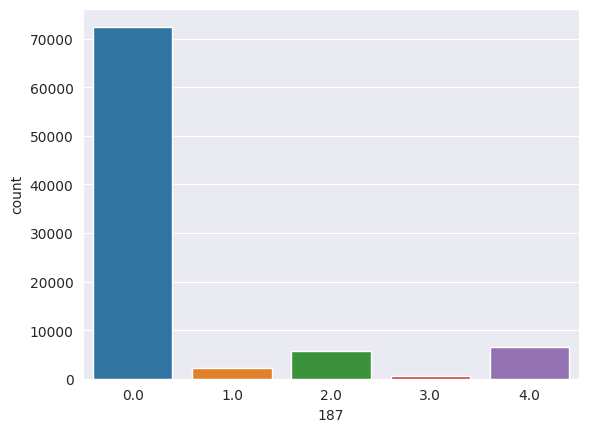

In [99]:
# Class Distribution
print("\nClass Distribution:")
print(data_train[187].value_counts())

# Bar Plot
sns.countplot(x=187, data=data_train)
plt.show()



Class Distribution:
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


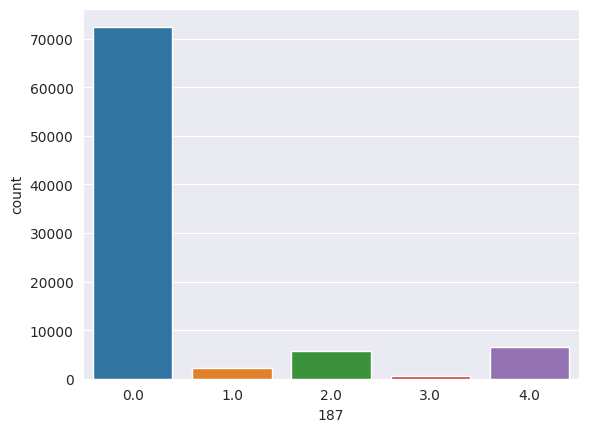

In [100]:
# Class Distribution
print("\nClass Distribution:")
print(data_train[187].value_counts())

# Bar Plot
sns.countplot(x=187, data=data_train)
plt.show()


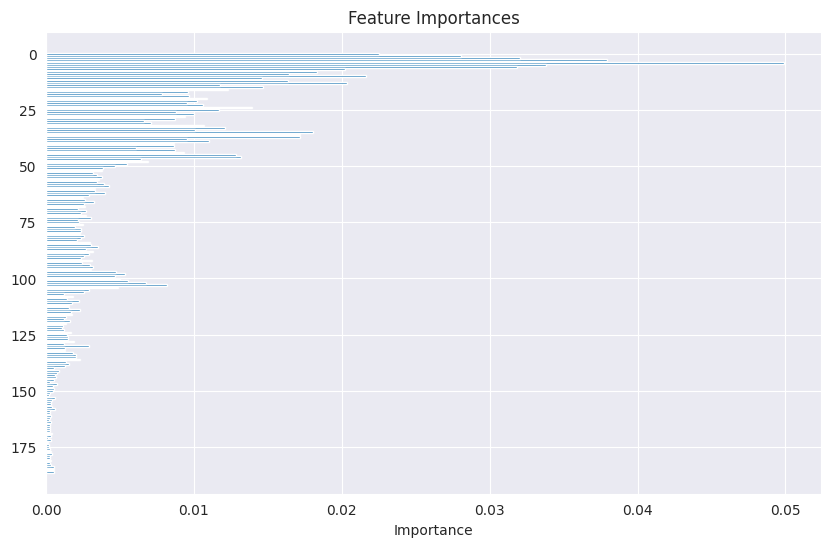

In [107]:
from sklearn.ensemble import RandomForestClassifier

X = data_train.drop(187, axis=1)
y = data_train[187]

clf = RandomForestClassifier()
clf.fit(X, y)

feature_importances = clf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()

# Sorting feature importance
sorted_indices = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_values = [feature_importances[i] for i in sorted_indices]
# Create the plot
plt.figure(figsize=(15, 10))
plt.barh(range(len(sorted_indices)), sorted_values, align='center')
plt.yticks(range(len(sorted_indices)), [str(i) for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
# Replace these values with your actual feature importances and feature names
feature_importances = np.random.rand(10)  # Random feature importances
feature_names = [f'Feature {i}' for i in range(10)]  # Placeholder feature names

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()

#ABNORMAL HEARTBEAT VISULAIZATION ||Abormal ECG Visualization
Below are some plots showing the ECG Curve of those persons who have an abnormal ECG rate

<ipython-input-18-6d5ffcb9ff63>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


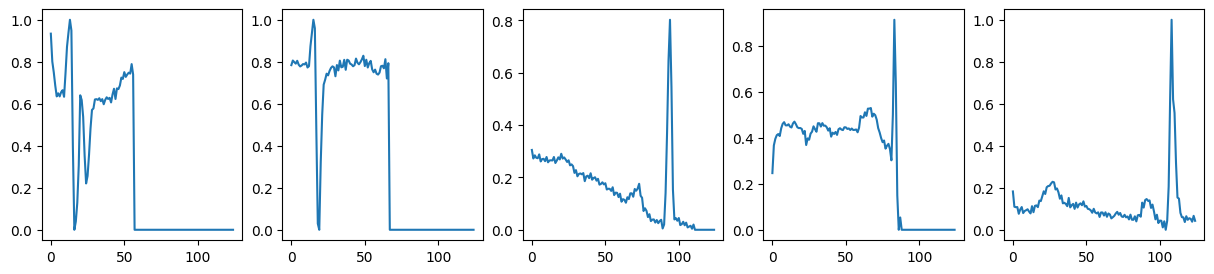

In [18]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Abormal Persons')
plt.subplot(1, 5, 1)
plt.plot(abnormal.values[0][5:130])
plt.subplot(1, 5, 2)
plt.plot(abnormal.values[10][5:130])
plt.subplot(1, 5, 3)
plt.plot(abnormal.values[20][5:130])
plt.subplot(1, 5, 4)
plt.plot(abnormal.values[40][5:130])
plt.subplot(1, 5, 5)
plt.plot(abnormal.values[44][5:130])

#NORMAL HEARTBEAT VISUALIZATION

<ipython-input-19-725bc6cf32a8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


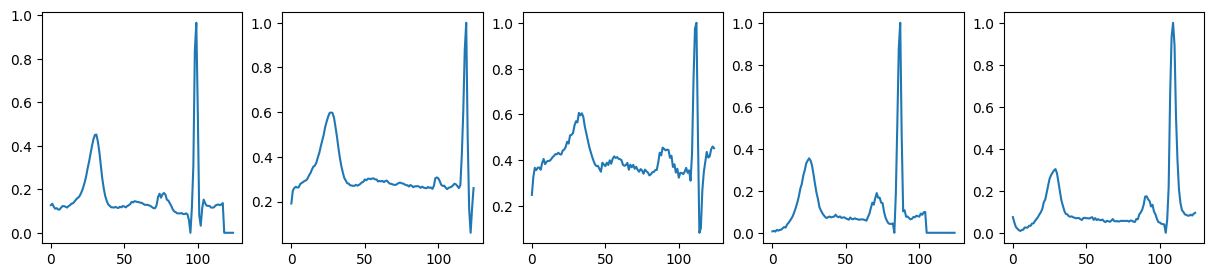

In [19]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(normal.values[0][5:130])
plt.subplot(1, 5, 2)
plt.plot(normal.values[10][5:130])
plt.subplot(1, 5, 3)
plt.plot(normal.values[20][5:130])
plt.subplot(1, 5, 4)
plt.plot(normal.values[40][5:130])
plt.subplot(1, 5, 5)
plt.plot(normal.values[77][5:130])

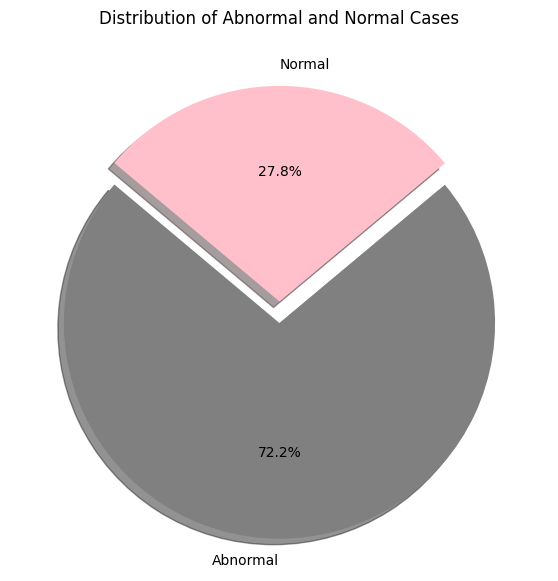

In [20]:
num_abnormal = len(abnormal)
num_normal = len(normal)

# Labels for the sections of our pie chart
labels = ['Abnormal', 'Normal']

# The values for each section of the pie chart
sizes = [num_abnormal, num_normal]

# The colors for each section of the pie chart
colors = ['grey', 'pink']

# Exploding the 1st slice (i.e. 'Abnormal')
explode = (0.1, 0)

# Plotting the Pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Abnormal and Normal Cases')
plt.show()


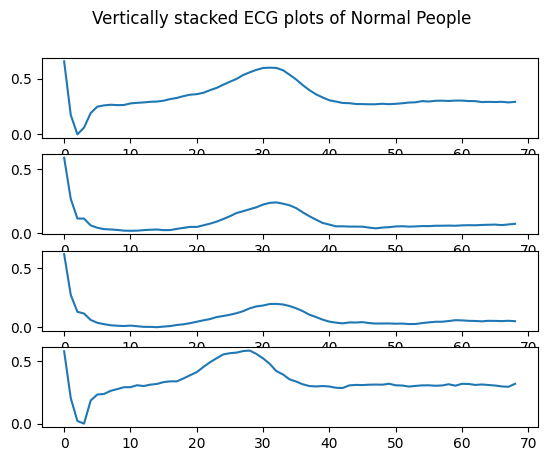

In [21]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked ECG plots of Normal People')
axs[0].plot(normal.values[10][1:70])
axs[1].plot(normal.values[55][1:70])
axs[2].plot(normal.values[87][1:70])
axs[3].plot(normal.values[98][1:70])


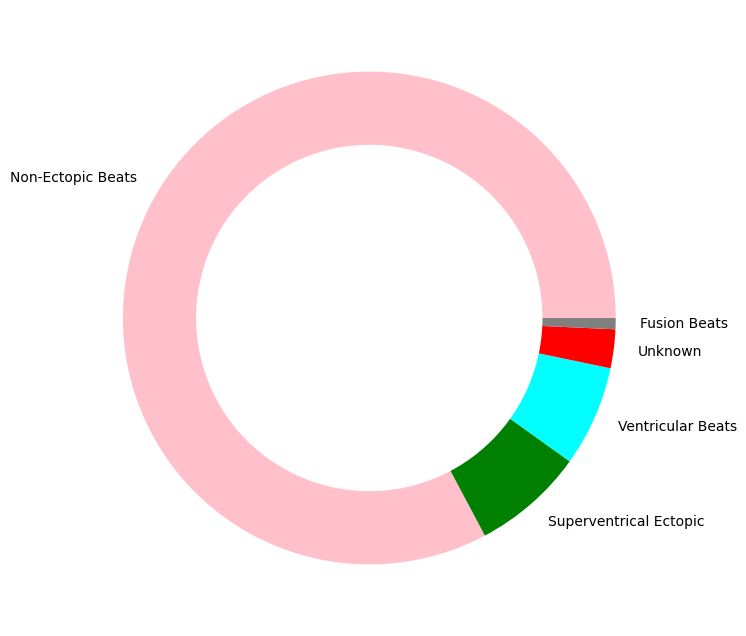

In [22]:
# viewing the distribution of beats in our dataset
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(data_train[187].value_counts(), labels=['Non-Ectopic Beats', 'Superventrical Ectopic', 'Ventricular Beats',
                                                'Unknown', 'Fusion Beats'], colors=['pink', 'green', 'cyan',
                                                                                   'red', 'grey'])
p = plt.gcf()
p.gca().add_artist(circle)

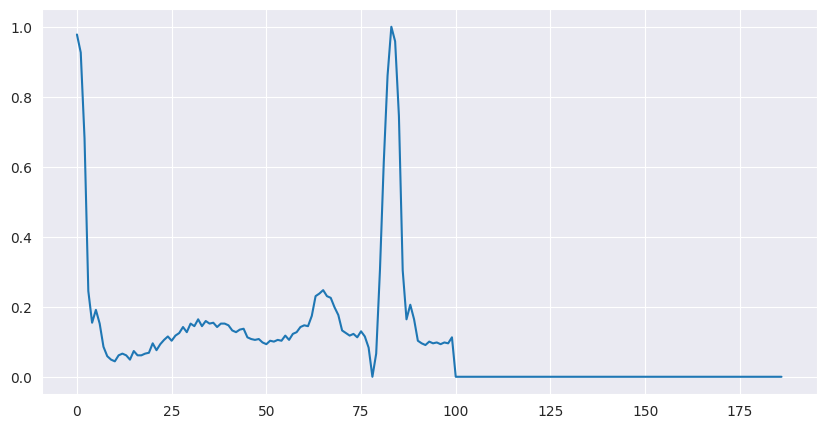

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187])

#CONCLUSION:
We can conclude from above figures that the persons having normal ECG rate, the figures are following a bell-curve pattern. The ECG of abnormal persons show othe types of curves. We'll use this information to make our machine learning model for classification.



#DATA PRE-PROCESSING ||

At this stage, we'll undergo some data preprocessing process to see if the data needs to be cleaned. Cleaned data is requried for model fitting in next phases.

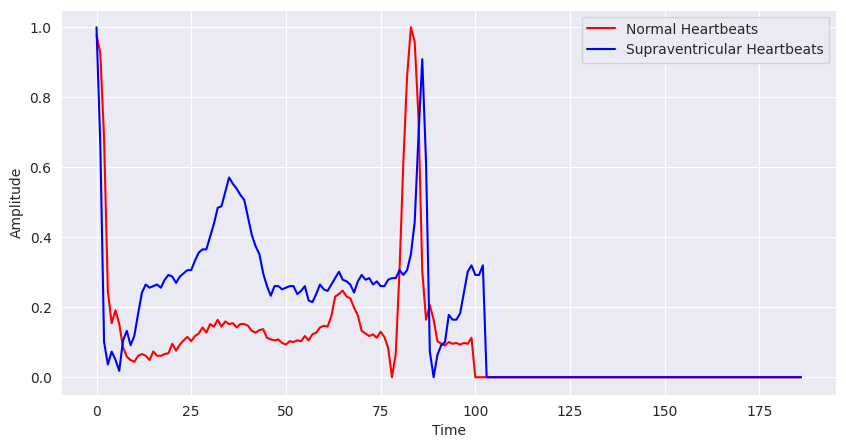

In [24]:
# making the class labels for our dataset
data_0 = data_train[data_train[187] == 0]
data_1 = data_train[data_train[187] == 1]
data_2 = data_train[data_train[187] == 2]
data_3 = data_train[data_train[187] == 3]
data_4 = data_train[data_train[187] == 4]

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_1.iloc[0, 0:187], color='blue', label='Supraventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

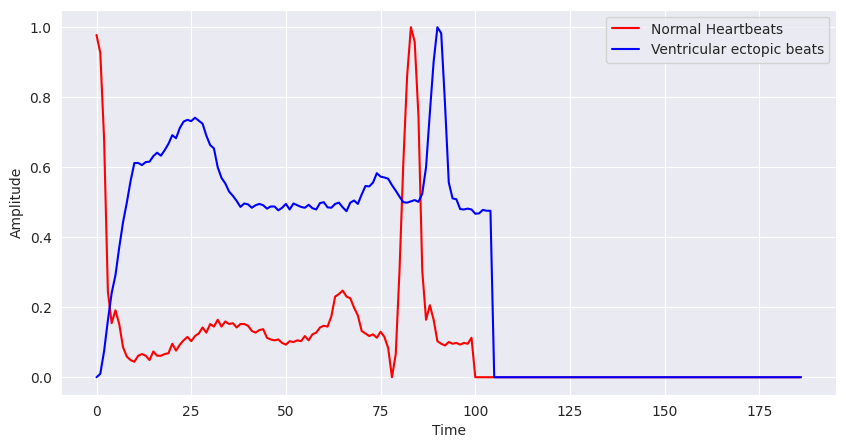

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_2.iloc[0, 0:187], color='blue', label='Ventricular ectopic beats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

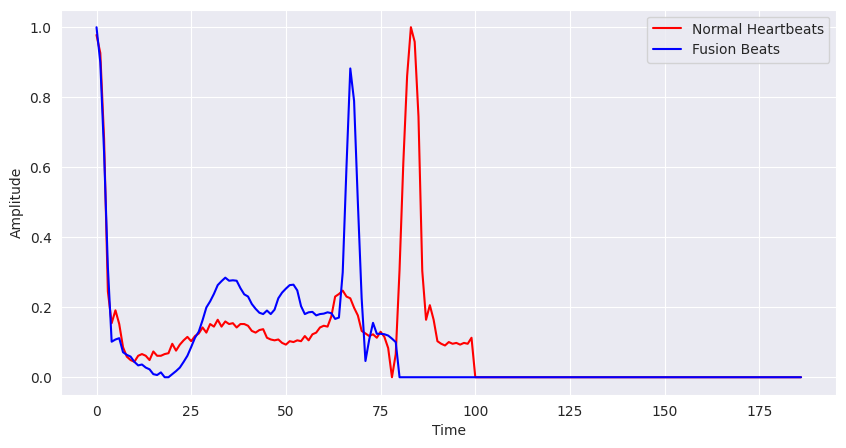

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='red', label='Normal Heartbeats')
plt.plot(data_3.iloc[0, 0:187], color='blue', label='Fusion Beats ')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

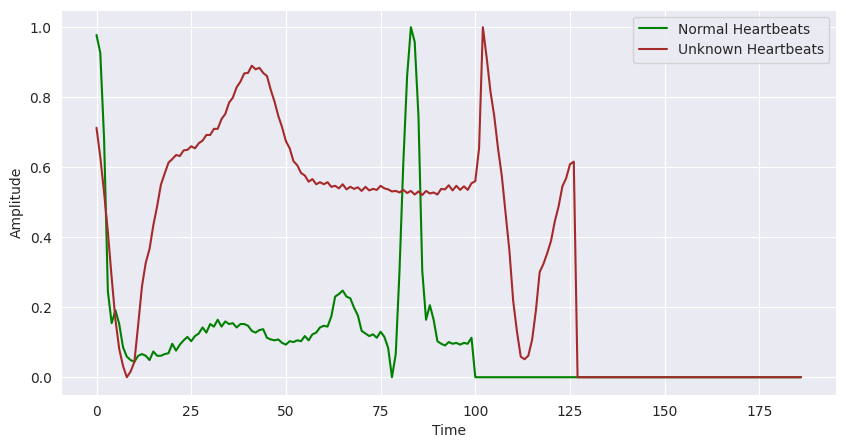

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(data_train.iloc[0, 0:187], color='green', label='Normal Heartbeats')
plt.plot(data_4.iloc[0, 0:187], color='brown', label='Unknown Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

In [105]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(data_train[data_train[187] == 0],
data_train[data_train[187] == 1],
)
print("\nHypothesis Testing:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")


Hypothesis Testing:
T-statistic: [  3.89808821  -0.87843129  28.76400115  24.75035771   4.62548497
  -1.88402068   1.24905691  -5.81597722 -12.03450952  -7.16822433
  -6.44302394 -11.62793921 -19.36795355 -24.40387236 -23.91846376
 -22.650475   -22.33648501 -21.92082538 -21.16629866 -20.5693866
 -20.03338854 -19.65127172 -18.88225554 -18.60769466 -18.39554284
 -18.47680659 -18.41012187 -18.72564584 -19.27191116 -20.34118524
 -21.85837268 -23.91354686 -26.00380372 -28.14674541 -29.61783118
 -30.82257655 -31.18980132 -30.31771694 -28.24076939 -25.65171328
 -22.79808366 -20.07419641 -18.2456913  -17.95795581 -19.16403063
 -19.96500845 -19.40085596 -18.31925835 -15.93402872 -13.0702805
 -11.21769297 -10.82719637  -9.92163819  -8.59429663  -6.7610078
  -4.51264701  -1.7798781    0.35572751   1.71892495   2.53790502
   3.2076347    2.78864408   1.63088379   0.33393965  -0.16363706
   0.20663064   0.58697137   0.64978773   0.68381848   0.18295247
   0.31478101   0.15623844  -0.17343444   0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


# Checking if there is any noise in abnormal dataset

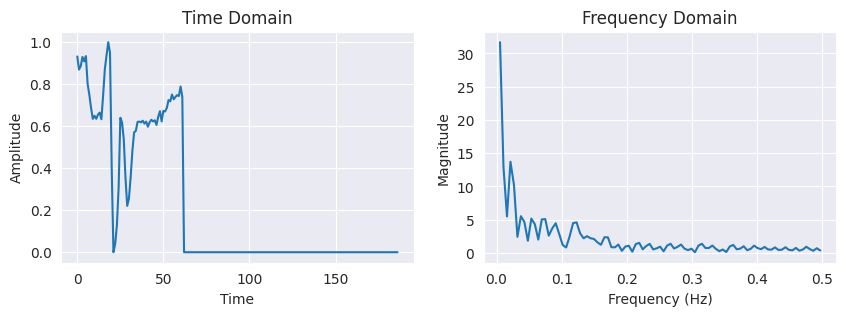

In [28]:
# Take a single ECG lead for analysis
single_lead = abnormal.iloc[0, :]

# Perform FFT
frequencies = np.fft.fftfreq(len(single_lead))
fft_values = np.fft.fft(single_lead)
positive_freq = frequencies[frequencies > 0]
fft_positive = np.abs(fft_values[frequencies > 0])

# Plot Time Domain Data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Time Domain')
plt.plot(single_lead)
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot Frequency Domain Data
plt.subplot(1, 2, 2)
plt.title('Frequency Domain')
plt.plot(positive_freq, fft_positive)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

#checking if there is any noise in normal dataset

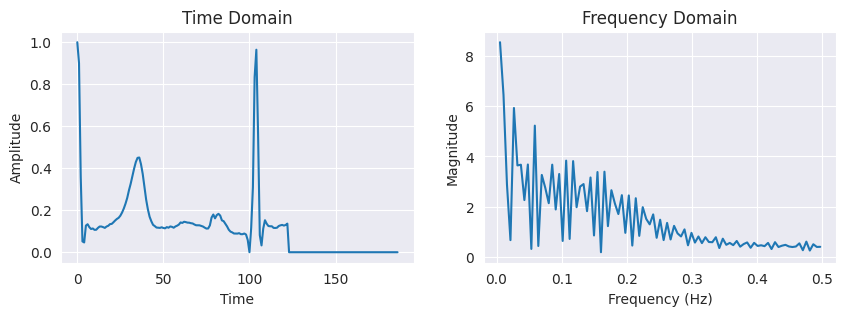

In [29]:
# Take a single ECG lead for analysis
single_lead = normal.iloc[0, :]

# Perform FFT
frequencies = np.fft.fftfreq(len(single_lead))
fft_values = np.fft.fft(single_lead)
positive_freq = frequencies[frequencies > 0]
fft_positive = np.abs(fft_values[frequencies > 0])

# Plot Time Domain Data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Time Domain')
plt.plot(single_lead)
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot Frequency Domain Data
plt.subplot(1, 2, 2)
plt.title('Frequency Domain')
plt.plot(positive_freq, fft_positive)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

#checking if there is any noise in train dataset

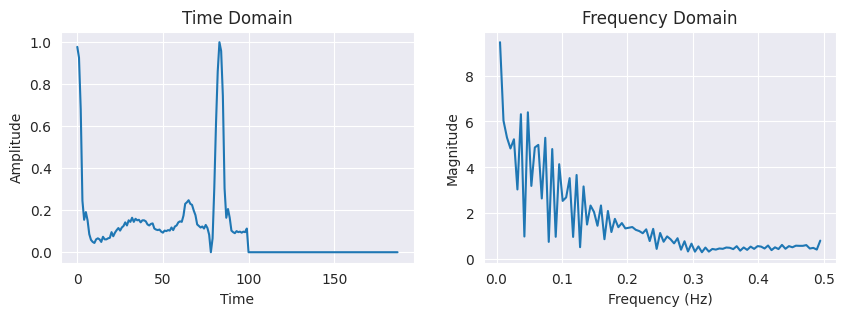

In [30]:
# Take a single ECG lead for analysis
single_lead = data_train.iloc[0, :]

# Perform FFT
frequencies = np.fft.fftfreq(len(single_lead))
fft_values = np.fft.fft(single_lead)
positive_freq = frequencies[frequencies > 0]
fft_positive = np.abs(fft_values[frequencies > 0])

# Plot Time Domain Data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Time Domain')
plt.plot(single_lead)
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot Frequency Domain Data
plt.subplot(1, 2, 2)
plt.title('Frequency Domain')
plt.plot(positive_freq, fft_positive)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

#checking if there is any noise for test data set

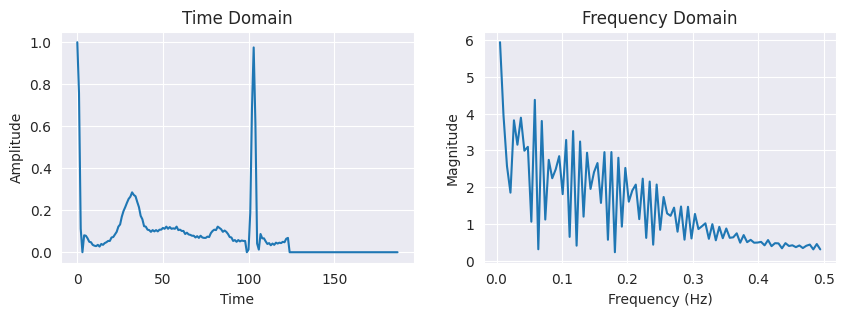

In [31]:
# Take a single ECG lead for analysis
single_lead = data_test.iloc[0, :]

# Perform FFT
frequencies = np.fft.fftfreq(len(single_lead))
fft_values = np.fft.fft(single_lead)
positive_freq = frequencies[frequencies > 0]
fft_positive = np.abs(fft_values[frequencies > 0])

# Plot Time Domain Data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Time Domain')
plt.plot(single_lead)
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot Frequency Domain Data
plt.subplot(1, 2, 2)
plt.title('Frequency Domain')
plt.plot(positive_freq, fft_positive)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Adding noise to see if there are any changes

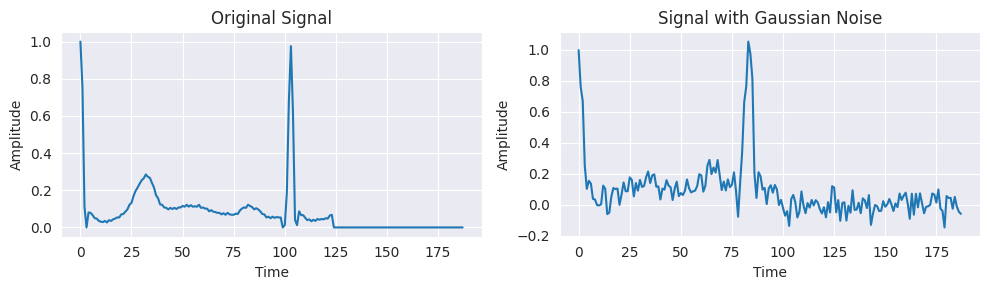

In [32]:
# Function to add Gaussian noise
def add_gaussian_noise(signal, noise_level=0.01):
    # Generate Gaussian noise
    noise = np.random.normal(0, noise_level, signal.shape)

    # Add the noise to the original signal
    signal_noise = signal + noise

    return signal_noise

# Add Gaussian noise to the single ECG lead
single_lead_noise = data_train.iloc[0, :]
noisy_signal = add_gaussian_noise(single_lead_noise, noise_level=0.05)

# Plot original and noisy signals
plt.figure(figsize=(10, 3))

# Original Signal
plt.subplot(1, 2, 1)
plt.title('Original Signal')
plt.plot(single_lead)
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Noisy Signal
plt.subplot(1, 2, 2)
plt.title('Signal with Gaussian Noise')
plt.plot(noisy_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [33]:
y_abnormal = np.ones(abnormal.shape[0])
y_abnormal = pd.DataFrame(y_abnormal)

y_normal = np.zeros(normal.shape[0])
y_normal = pd.DataFrame(y_normal)

# merging the original dataframe
X = pd.concat([abnormal, normal], sort=True)
y = pd.concat([y_abnormal, y_normal], sort=True)


In [34]:
X.shape

(14552, 187)

In [35]:
y.shape

(14552, 1)

In [36]:
normal.isnull().sum().sum()

0

In [37]:
abnormal.isnull().sum().sum()

0

The output of above cell shows that there are no null values in our data, and the data can now be used for model fitting. We have two types of datasets, normal and abnormal, and they'll be used for model fitting.

In [38]:
train_dataset = pd.concat([data_0,data_1,data_2, data_3,data_4])

#MAKING X & Y VARIABLES

In [39]:
target_train = train_dataset[187]
target_test = data_test[187]
target_train.unique()

array([0., 1., 2., 3., 4.])

In [40]:
y_train =  utils.to_categorical(target_train)
y_test = utils.to_categorical(target_test)
y_train[:4]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [41]:
np.argmax(y_test,axis=1)

array([0, 0, 0, ..., 4, 4, 4])

#DATA SLICING

This stage involves the data split into train & test sets. The training data will be used for training our model, and the testing data will be used to check the performance of model on unseen dataset. We're using a split of 80-20, i.e., 80% data to be used for training & 20% to be used for testing purpose.



In [42]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = data_test.iloc[:, :-1].values

In [43]:
X_train.shape


(87554, 187)

In [44]:
X_test.shape

(21892, 187)

In [45]:
y_train.shape

(87554, 5)

In [46]:
y_test.shape

(21892, 5)

#APPLYING MODEL

Random Forest Classification
Support Vector Machines (SVM)
Convolutional Neural Network (CNN)

## Convolutional Neural Network (CNN)

We will apply the CNN algorithm to our data to generate prediction results. First, we need to reshape our data for CNN. We will use 1-dimensional CNN for our model, reshaping our data as per the dimensins of our CNN>

In [47]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((87554, 187, 1), (21892, 187, 1))

In [48]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [49]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           448       
                                                                 
 batch_normalization (Batch  (None, 187, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 94, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            24640     
                                                                 
 batch_normalization_1 (Bat  (None, 94, 64)            256       
 chNormalization)                                                
                                                        

In [50]:
import time
file_path = "baseline_1Dcnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor='val_accuracy', mode="max", patience=3, verbose=2)
logger = CSVLogger('logs.csv', append=True)
start_time = time.time()
history = model.fit(X_train,y_train, epochs=10, verbose=2, callbacks=[logger,early,redonplat,checkpoint],validation_split=0.1,validation_data=(X_test,y_test))
end_time = time.time()
# Compute the total time taken
total_time = end_time - start_time

print(f"Total time taken for training: {total_time} seconds")


model.load_weights(file_path)

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.97693, saving model to baseline_1Dcnn_mitbih.h5
2737/2737 - 36s - loss: 0.1169 - accuracy: 0.9677 - val_loss: 0.0893 - val_accuracy: 0.9769 - lr: 0.0010 - 36s/epoch - 13ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.97693 to 0.97743, saving model to baseline_1Dcnn_mitbih.h5
2737/2737 - 20s - loss: 0.0683 - accuracy: 0.9802 - val_loss: 0.0815 - val_accuracy: 0.9774 - lr: 0.0010 - 20s/epoch - 7ms/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.97743 to 0.98388, saving model to baseline_1Dcnn_mitbih.h5
2737/2737 - 22s - loss: 0.0535 - accuracy: 0.9838 - val_loss: 0.0601 - val_accuracy: 0.9839 - lr: 0.0010 - 22s/epoch - 8ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.98388
2737/2737 - 18s - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0594 - val_accuracy: 0.9838 - lr: 0.0010 - 18s/epoch - 7ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.98388
2737/2737 - 20s - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0692 - val_accuracy: 0.9821 - lr: 0.0010 - 20s/epoch - 7ms/step
Epoch 6/10

Epoch 6: val_accuracy improved from 0.98388 to 0.98497, saving model to baseline_1Dcnn_mitbih.h5
2737/2737 - 19s - loss: 0.0357 - accuracy: 0.9

In [51]:
model.evaluate(X_test, y_test)

685/685 [==============================] - 3s 4ms/step - loss: 0.0538 - accuracy: 0.9887


[0.05382070317864418, 0.9887173175811768]

In [52]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

#Graphical Visualization of Predictions

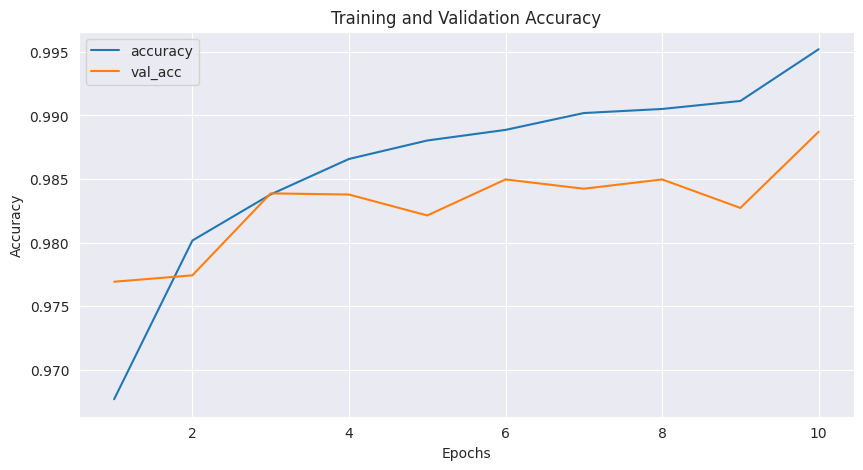

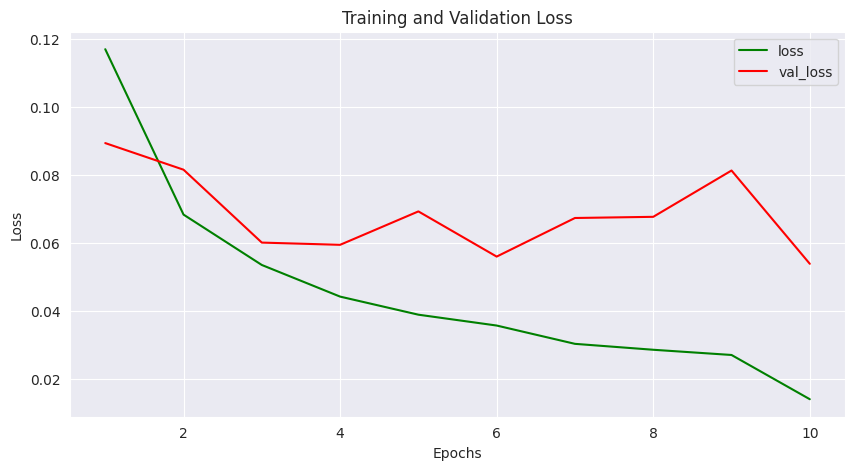

In [53]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc =history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [54]:
y_pred = model.predict(X_test)
y_hat = np.argmax(y_pred, axis = 1)
confusion_matrix(np.argmax(y_test, axis = 1), y_hat)

685/685 [==============================] - 2s 2ms/step


array([[18058,    39,    14,     5,     2],
       [   80,   469,     5,     1,     1],
       [   26,     5,  1399,    16,     2],
       [   24,     0,    13,   125,     0],
       [   12,     1,     1,     0,  1594]])

<Axes: >

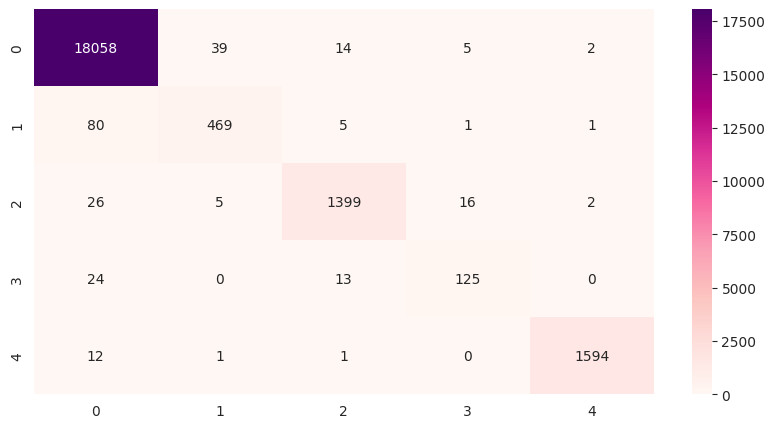

In [55]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), y_hat), annot=True, fmt='0.0f', cmap='RdPu')

In [56]:
# Convert one-hot encoded y_test to integer labels
y_test_integer = np.argmax(y_test, axis=1)

In [57]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(y_test_integer, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(y_test_integer, pred_test)

print("Test accuracy score : %s "% acc)

685/685 [==============================] - 2s 2ms/step
Test f1 score : 0.92914765202315 
Test accuracy score : 0.9887173396674585 


In [58]:
print(classification_report(y_test_integer, pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.91      0.84      0.88       556
           2       0.98      0.97      0.97      1448
           3       0.85      0.77      0.81       162
           4       1.00      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.95      0.91      0.93     21892
weighted avg       0.99      0.99      0.99     21892



## Predicting on one set of the dataset

In [59]:
from keras.models import load_model

In [60]:
test_data = pd.read_csv('/content/mitbih_test.csv', header=None)

In [61]:
test_data_labels = utils.to_categorical(test_data.iloc[:,-1])

In [62]:
actual_abnormal_X_test = test_data[test_data[187]==3].iloc[:,:-1] # taking abnormal for label 3 as an example
test_data_labels_filter = test_data_labels[test_data_labels[:, 3] == 1]

In [63]:
actual_abnormal_X_test.shape

(162, 187)

In [64]:
test_data_labels_filter.shape

(162, 5)

In [65]:
X_test = np.array(actual_abnormal_X_test)
random_index = np.random.randint(0, X_test.shape[0])
ecg_one_row_data = X_test[random_index]
ecg_one_row_label = test_data_labels_filter[random_index]

In [66]:
ecg_one_row_label

array([0., 0., 0., 1., 0.], dtype=float32)

In [67]:
ecg_one_row_data_reshape = ecg_one_row_data.reshape(1,X_test.shape[1],1)

In [68]:
benchmark_cnn_model = load_model('/content/baseline_1Dcnn_mitbih.h5')

In [69]:
prediction = np.argmax(benchmark_cnn_model.predict(ecg_one_row_data_reshape))

1/1 [==============================] - 0s 223ms/step


In [70]:
print("Actual Label: ", np.argmax(ecg_one_row_label))
print("Predicted Label: ", prediction)

Actual Label:  3
Predicted Label:  3


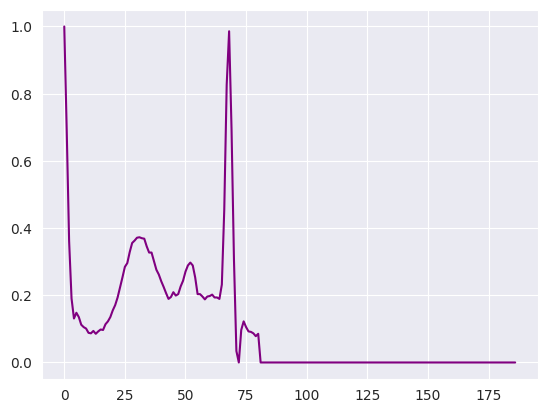

In [71]:
plt.plot(ecg_one_row_data, color='purple')

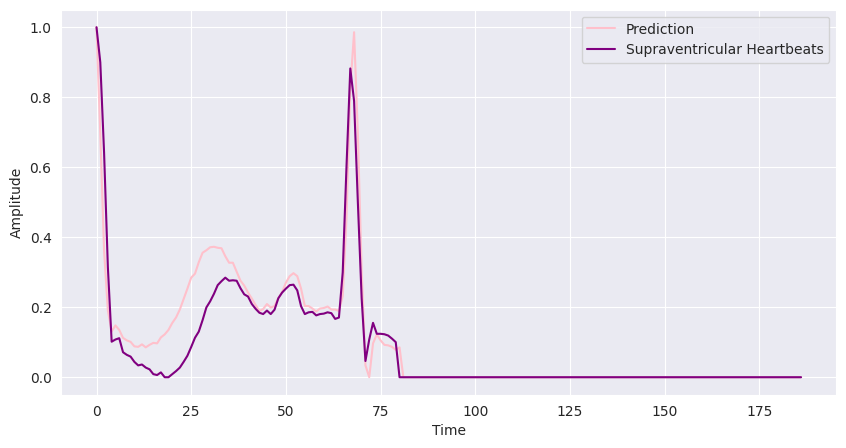

In [72]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(ecg_one_row_data, color='pink', label='Prediction')
plt.plot(data_3.iloc[0, 0:187], color='purple', label='Supraventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

#SVM for expriments

In [73]:

def feature_extractor(input_shape=(187, 1)):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the CNN model
cnn_model = feature_extractor()

In [74]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape
# Extract features from the training and test data
train_features = cnn_model.predict(X_train)
test_features = cnn_model.predict(X_test)
y_train_svm = np.argmax(y_train, axis=1)
y_test_svm = np.argmax(y_test, axis=1)

6/6 [==============================] - 0s 3ms/step


In [75]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_model = SVC()
# Fit the model
svm_model.fit(train_features, y_train_svm)

SVC()

In [76]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (21892, 5)
Shape of y_pred: (21892, 5)


In [77]:
# Feature extraction using CNN
test_features = cnn_model.predict(X_test)

# Convert one-hot encoded labels back to integer labels
y_test_integer = np.argmax(y_test, axis=1)

# SVM Prediction
y_pred = svm_model.predict(test_features)

6/6 [==============================] - 0s 3ms/step


In [78]:
y_test_svm_subset = y_test_svm[:162]

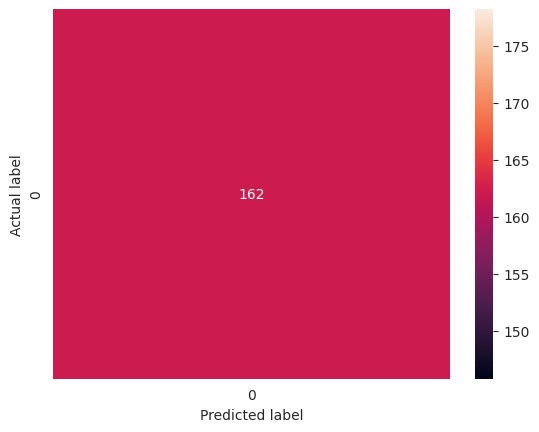

In [79]:
cm = confusion_matrix(y_test_svm_subset, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [80]:
report = classification_report(y_test_svm_subset, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



## Optimized Model

In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [82]:
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=100, stratify=y_train)

In [83]:
import shutil
import os

if os.path.exists('/content/ECG_MODEL'):
    shutil.rmtree('/content/ECG_MODEL')

In [84]:
def build_CNN_model(hp):
    '''
    Perfrom the Hyperparameter tuning on number of Convolution Layers and Number of Fully Connected Layers
    -> In each Convolution Layer, hyperparameter tuning is done on number of filters, kernel size, pool size and dropouts
    -> In each Fully Connected Layers, hyperparameter tuning is done on number of units and dropouts
    '''
    # create model object
    model = tf.keras.Sequential()
    # 1st Convolution Layer
    kernel_size=hp.Choice('kernel_size_0', values=[2,3,4])
    model.add(Conv1D(filters = hp.Int('conv_0_filter', min_value=8, max_value=16, step=2),
                        kernel_size = (kernel_size),
                        activation='relu',
                        input_shape=(187, 1)))
    model.add(Dropout(hp.Float('dropout_0', min_value=0.05, max_value=0.1, step=0.01)))
    pool_size=hp.Choice('pool_size_0', values=[2,3])
    model.add(MaxPooling1D(pool_size=(pool_size),padding='same'))

    for i in range(hp.Int('number_of_convolution_layers', 0, 2)):
        # ith Convolution Layer
        kernel_size=hp.Choice(f'kernel_size_{i}', values=[2,3,4])
        model.add(Conv1D(filters = hp.Int(f'conv_{i}_filter', min_value=16, max_value=32, step=2),
                            kernel_size = (kernel_size),
                            activation='relu'))
        model.add(Conv1D(filters = hp.Int(f'conv_{i}_filter', min_value=32, max_value=64, step=2),
                            kernel_size = (kernel_size),
                            activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.05, max_value=0.1, step=0.01)))
        pool_size=hp.Choice(f'pool_size_{i}', values=[2,3])
        model.add(MaxPooling1D(pool_size=( pool_size),padding='same'))

    model.add(Flatten())

    model.add(Dropout(hp.Float('dropout_3', min_value=0.05, max_value=0.1, step=0.01)))
    for j in range(hp.Int('number_of_hidden_layers', 1, 3)):
        # jth Hidden Dense Layer
        hp_units = hp.Int(f'hidden_layer_{j}_units', min_value=8, max_value=256, step=4)
        model.add(Dense(units=hp_units, activation='relu'))
        # Add dropout for regularization
        hp_dropout = hp.Float(f'hidden_layer_{j}_dropout', min_value=0.05, max_value=0.2, step=0.01)
        model.add(Dropout(hp_dropout))

    model.add(Dense(5, activation='softmax'))
    '''
    Hyperparameter tuning on learning rate
    '''
    # Define the optimizer with the given learning rate
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=0.00001, max_value=0.001, step=0.00001))
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #model.summary()
    return model

In [85]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.1 MB/s eta 0:00:00


In [86]:
# Define tuner to optimize the hyperparamaters using Random Search Optimization
from keras_tuner import RandomSearch
tuner = RandomSearch(build_CNN_model,
                      max_trials = 5,
                              objective='val_accuracy',
                              directory = 'ECG_MODEL', # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                              project_name = 'ECG_PREDICTION',seed=100)

In [87]:
import IPython
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [88]:
# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True,mode='max')
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
                                                         monitor = "val_loss",
                                                         factor = 0.1,
                                                         patience = 3,
                                                         verbose = 0,
                                                         mode = "min"
                                                         )

start_time = time.time()
# Search for the best parameters
tuner.search(X_train_subset, y_train_subset,

             batch_size = 1000,
             epochs=100,
             validation_data=(X_val, y_val),  # Use the validation data here
             callbacks = [ClearTrainingOutput(), early_stopping, reduce_lr_on_plateau])
end_time = time.time()
total_time = end_time - start_time

print(f"Total time taken for training: {total_time} seconds")

Trial 5 Complete [00h 01m 21s]
val_accuracy: 0.9835541248321533

Best val_accuracy So Far: 0.9835541248321533
Total elapsed time: 00h 04m 18s
Total time taken for training: 258.1314523220062 seconds


In [89]:
best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]
for param_name in best_hps.values.keys():
    print(f"{param_name}: {best_hps.get(param_name)}")

kernel_size_0: 2
conv_0_filter: 8
dropout_0: 0.060000000000000005
pool_size_0: 2
number_of_convolution_layers: 2
dropout_3: 0.060000000000000005
number_of_hidden_layers: 3
hidden_layer_0_units: 204
hidden_layer_0_dropout: 0.1
learning_rate: 0.00033000000000000005
kernel_size_1: 4
conv_1_filter: 22
dropout_1: 0.05
pool_size_1: 3
hidden_layer_1_units: 244
hidden_layer_1_dropout: 0.19
hidden_layer_2_units: 44
hidden_layer_2_dropout: 0.14


In [90]:
'''
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from tensorflow.keras import layers #layers

# Define the model
def build_model(hp):
    model = keras.Sequential()

    # Tuning the number of units in the first LSTM layer
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                          input_shape=(187, 1)))

    # Tuning the activation function in the Dense layer
    model.add(layers.Dense(1, activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'])))

    # Tuning the optimizer
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
                  loss='mse',
                  metrics=['mse'])

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True,mode='max')
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
                                                         monitor = "val_mse",
                                                         factor = 0.1,
                                                         patience = 3,
                                                         verbose = 0,
                                                         mode = "min"
                                                         )
'''

'\nfrom tensorflow import keras\nfrom keras_tuner.tuners import RandomSearch\nfrom tensorflow.keras import layers #layers\n\n# Define the model\ndef build_model(hp):\n    model = keras.Sequential()\n\n    # Tuning the number of units in the first LSTM layer\n    model.add(layers.LSTM(units=hp.Int(\'units\', min_value=32, max_value=512, step=32),\n                          input_shape=(187, 1)))\n\n    # Tuning the activation function in the Dense layer\n    model.add(layers.Dense(1, activation=hp.Choice(\'dense_activation\', values=[\'relu\', \'tanh\', \'sigmoid\'])))\n\n    # Tuning the optimizer\n    model.compile(optimizer=hp.Choice(\'optimizer\', values=[\'adam\', \'sgd\']),\n                  loss=\'mse\',\n                  metrics=[\'mse\'])\n\n    return model\n\n# Initialize the tuner\ntuner = RandomSearch(\n    build_model,\n    objective=\'val_mse\',\n    max_trials=5,\n    executions_per_trial=3,\n    directory=\'my_dir\',\n    project_name=\'helloworld\')\n\nearly_stopping

In [91]:
'''
import time
start_time = time.time()
# Search for the best parameters
tuner.search(X_train_subset, y_train_subset,
             batch_size = 1000,
             epochs=50,
             validation_data=(X_val, y_val),  # Use the validation data here
             callbacks = [ClearTrainingOutput(), early_stopping, reduce_lr_on_plateau])
end_time = time.time()
total_time = end_time - start_time

print(f"Total time taken for training: {total_time} seconds")
'''

'\nimport time\nstart_time = time.time()\n# Search for the best parameters\ntuner.search(X_train_subset, y_train_subset,\n             batch_size = 1000,\n             epochs=50,\n             validation_data=(X_val, y_val),  # Use the validation data here\n             callbacks = [ClearTrainingOutput(), early_stopping, reduce_lr_on_plateau])\nend_time = time.time()\ntotal_time = end_time - start_time\n\nprint(f"Total time taken for training: {total_time} seconds")\n'

#Cross- Validation

## SVM

In [108]:
from sklearn.model_selection import cross_val_score

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel and other parameters

# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm_model, train_features, y_train_svm, cv=10)

# Calculate mean and standard deviation
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print(f"Mean accuracy: {mean_score}")
print(f"Standard deviation: {std_dev}")


Mean accuracy: 0.8277291746620543
Standard deviation: 4.497979261861443e-05


In [109]:
cv_scores

array([0.82777524, 0.82766103, 0.82766103, 0.82766103, 0.82775557,
       0.82775557, 0.82775557, 0.82775557, 0.82775557, 0.82775557])

##CNN

In [111]:
from sklearn.model_selection import KFold


# Preprocess y_train if it's not already one-hot encoded
# y_train = to_categorical(y_train)

# Number of folds
n_folds = 10

# Initialize KFold
kf = KFold(n_splits=n_folds)

# Store each fold's validation accuracy
validation_accuracies = []

for train, val in kf.split(X_train):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(187, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    cv_scores_cnn = validation_accuracies.append(val_accuracy)

# Calculate and print the mean and standard deviation of validation accuracies
mean_accuracy = np.mean(validation_accuracies)
std_deviation = np.std(validation_accuracies)

print(f"Mean Validation Accuracy: {mean_accuracy}")
print(f"Standard Deviation of Validation Accuracies: {std_deviation}")

Mean Validation Accuracy: 0.5077383266296238
Standard Deviation of Validation Accuracies: 0.484660750994055
